# Учимся работе с данными - от загрузки до моделирования

In [1]:
#YOUR CODE HERE
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import kagglehub

path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")
print("Path to dataset files:", path)
data = pd.read_csv(path + "/data.csv")
data.head()

Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\uciml\breast-cancer-wisconsin-data\versions\2


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
print("=== БАЗОВАЯ ИНФОРМАЦИЯ О ДАТАСЕТЕ ===")
print(f"Количество строк: {data.shape[0]}")
print(f"Количество столбцов: {data.shape[1]}")
print("\nИнформация о типах данных:")
print(data.info())

=== БАЗОВАЯ ИНФОРМАЦИЯ О ДАТАСЕТЕ ===
Количество строк: 569
Количество столбцов: 33

Информация о типах данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se             

In [7]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
# Удалим ненужный столбец 'Unnamed: 32'
df = data.drop(columns=['Unnamed: 32'])

Пропущенные значения:
0

Базовые статистики числовых признаков:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799      

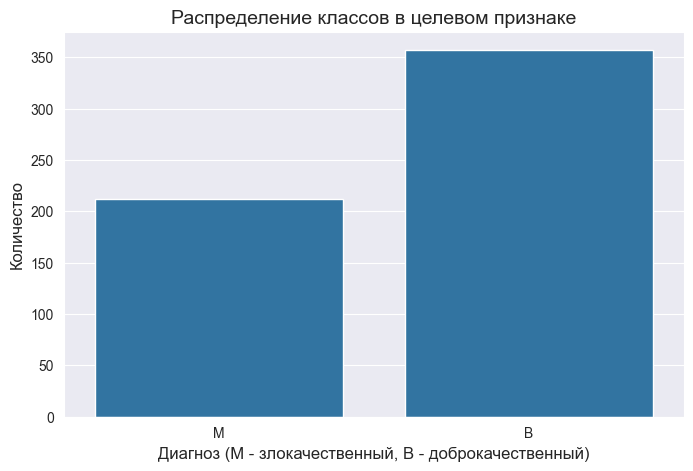

In [10]:
print("Пропущенные значения:")
print(df.isnull().sum().sum())

print("\nБазовые статистики числовых признаков:")
print(df.describe())

# Информация о целевом признаке
print("\n" + "="*80)
print("Анализ целевой переменной (diagnosis):")
print(f"Значения: {df['diagnosis'].unique()}")
print("\nРаспределение классов:")
class_dist = df['diagnosis'].value_counts()
print(class_dist)
print(f"\nДоля злокачественных (M): {class_dist['M']/len(df)*100:.2f}%")
print(f"Доля доброкачественных (B): {class_dist['B']/len(df)*100:.2f}%")

# Визуализация распределения классов
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='diagnosis')
plt.title('Распределение классов в целевом признаке', fontsize=14)
plt.xlabel('Диагноз (M - злокачественный, B - доброкачественный)', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.show()

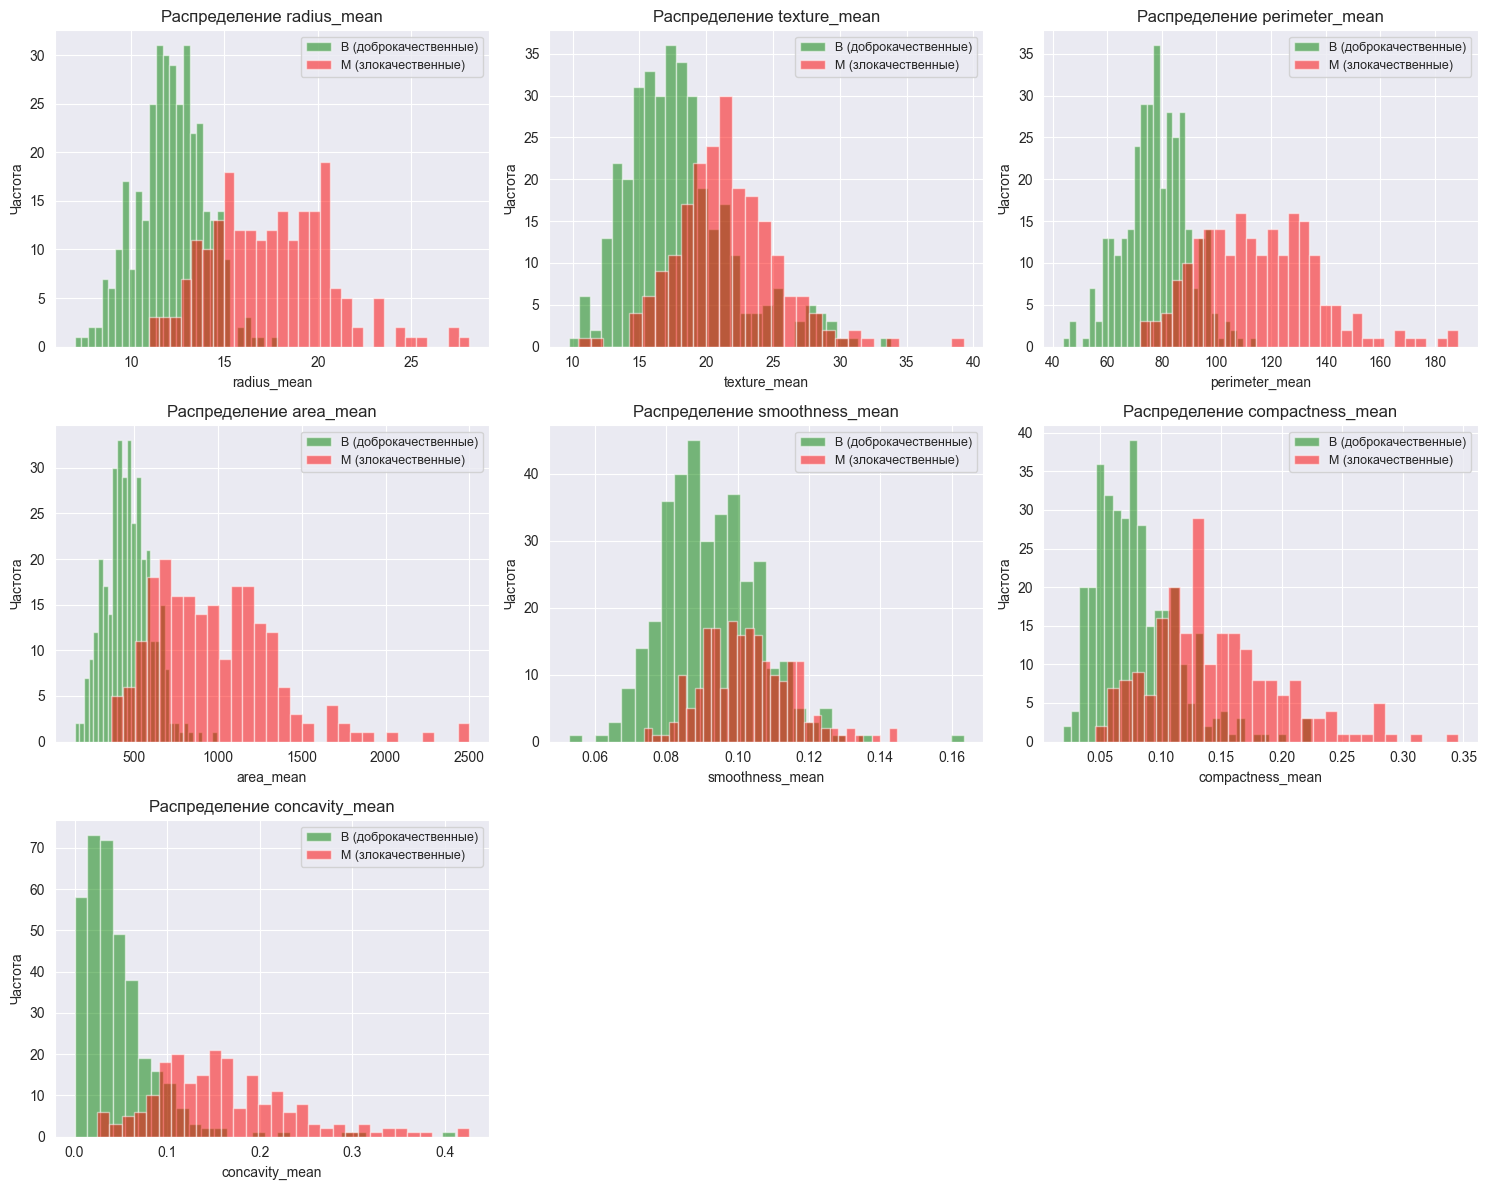

In [12]:
# Выберем несколько ключевых признаков для визуализации
key_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                'smoothness_mean', 'compactness_mean', 'concavity_mean']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, feature in enumerate(key_features[:9]):
    # Гистограмма с наложением для двух классов
    ax = axes[idx]

    # Доброкачественные (B)
    df[df['diagnosis'] == 'B'][feature].hist(bins=30, alpha=0.5, label='B (доброкачественные)',
                                           color='green', ax=ax)
    # Злокачественные (M)
    df[df['diagnosis'] == 'M'][feature].hist(bins=30, alpha=0.5, label='M (злокачественные)',
                                           color='red', ax=ax)

    ax.set_title(f'Распределение {feature}', fontsize=12)
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Частота', fontsize=10)
    ax.legend(fontsize=9)

# Удаляем пустые subplots
for i in range(len(key_features[:9]), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

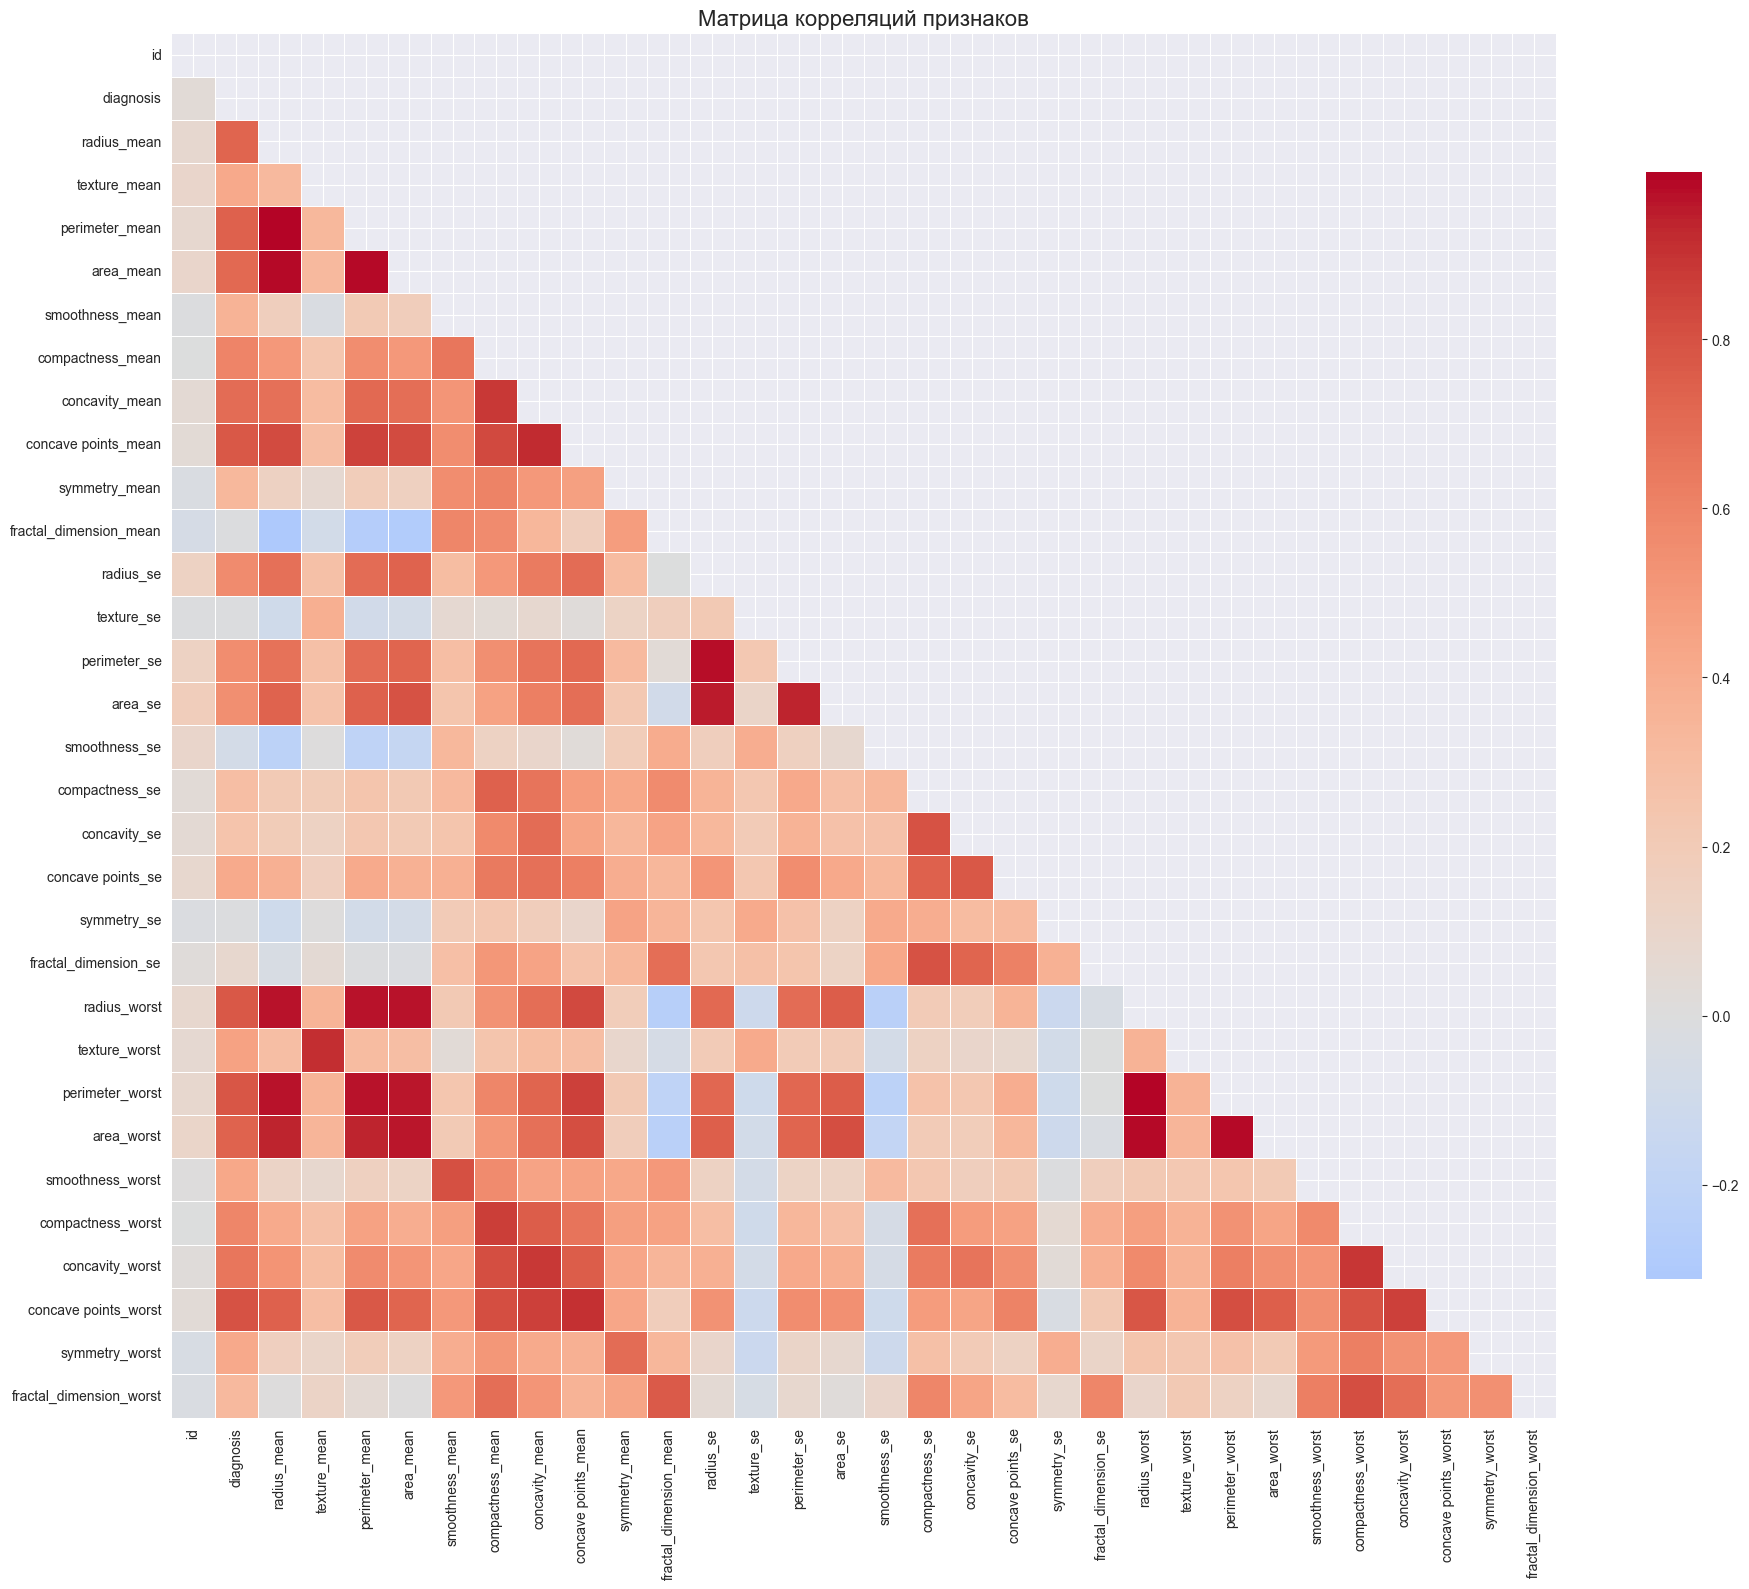

Наиболее сильно коррелированные пары признаков:
perimeter_mean   radius_mean        0.997855
radius_mean      perimeter_mean     0.997855
radius_worst     perimeter_worst    0.993708
perimeter_worst  radius_worst       0.993708
radius_mean      area_mean          0.987357
area_mean        radius_mean        0.987357
                 perimeter_mean     0.986507
perimeter_mean   area_mean          0.986507
area_worst       radius_worst       0.984015
radius_worst     area_worst         0.984015
perimeter_worst  area_worst         0.977578
area_worst       perimeter_worst    0.977578
perimeter_se     radius_se          0.972794
radius_se        perimeter_se       0.972794
perimeter_worst  perimeter_mean     0.970387
perimeter_mean   perimeter_worst    0.970387
radius_worst     radius_mean        0.969539
radius_mean      radius_worst       0.969539
perimeter_mean   radius_worst       0.969476
radius_worst     perimeter_mean     0.969476
dtype: float64

Наиболее коррелированные признаки: [

In [13]:
# Преобразуем целевую переменную в числовой формат для корреляции
df_numeric = df.copy()
df_numeric['diagnosis'] = df_numeric['diagnosis'].map({'M': 1, 'B': 0})

# Вычисляем корреляционную матрицу
correlation_matrix = df_numeric.corr()

# Создаем большую heatmap
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Матрица корреляций признаков', fontsize=16)
plt.tight_layout()
plt.show()

# Найдем наиболее сильно коррелированные признаки (исключая само с собой)
print("Наиболее сильно коррелированные пары признаков:")
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(key=abs, ascending=False)

# Исключаем корреляции признаков самих с собой (значения 1.0)
high_corr_pairs = sorted_pairs[(sorted_pairs != 1.0) & (abs(sorted_pairs) > 0.8)]
print(high_corr_pairs.head(20))

# Создаем список наиболее коррелированных пар для дальнейшего анализа
high_corr_features = set()
for pair in high_corr_pairs.index[:10]:
    high_corr_features.add(pair[0])
    high_corr_features.add(pair[1])

print(f"\nНаиболее коррелированные признаки: {list(high_corr_features)[:10]}")

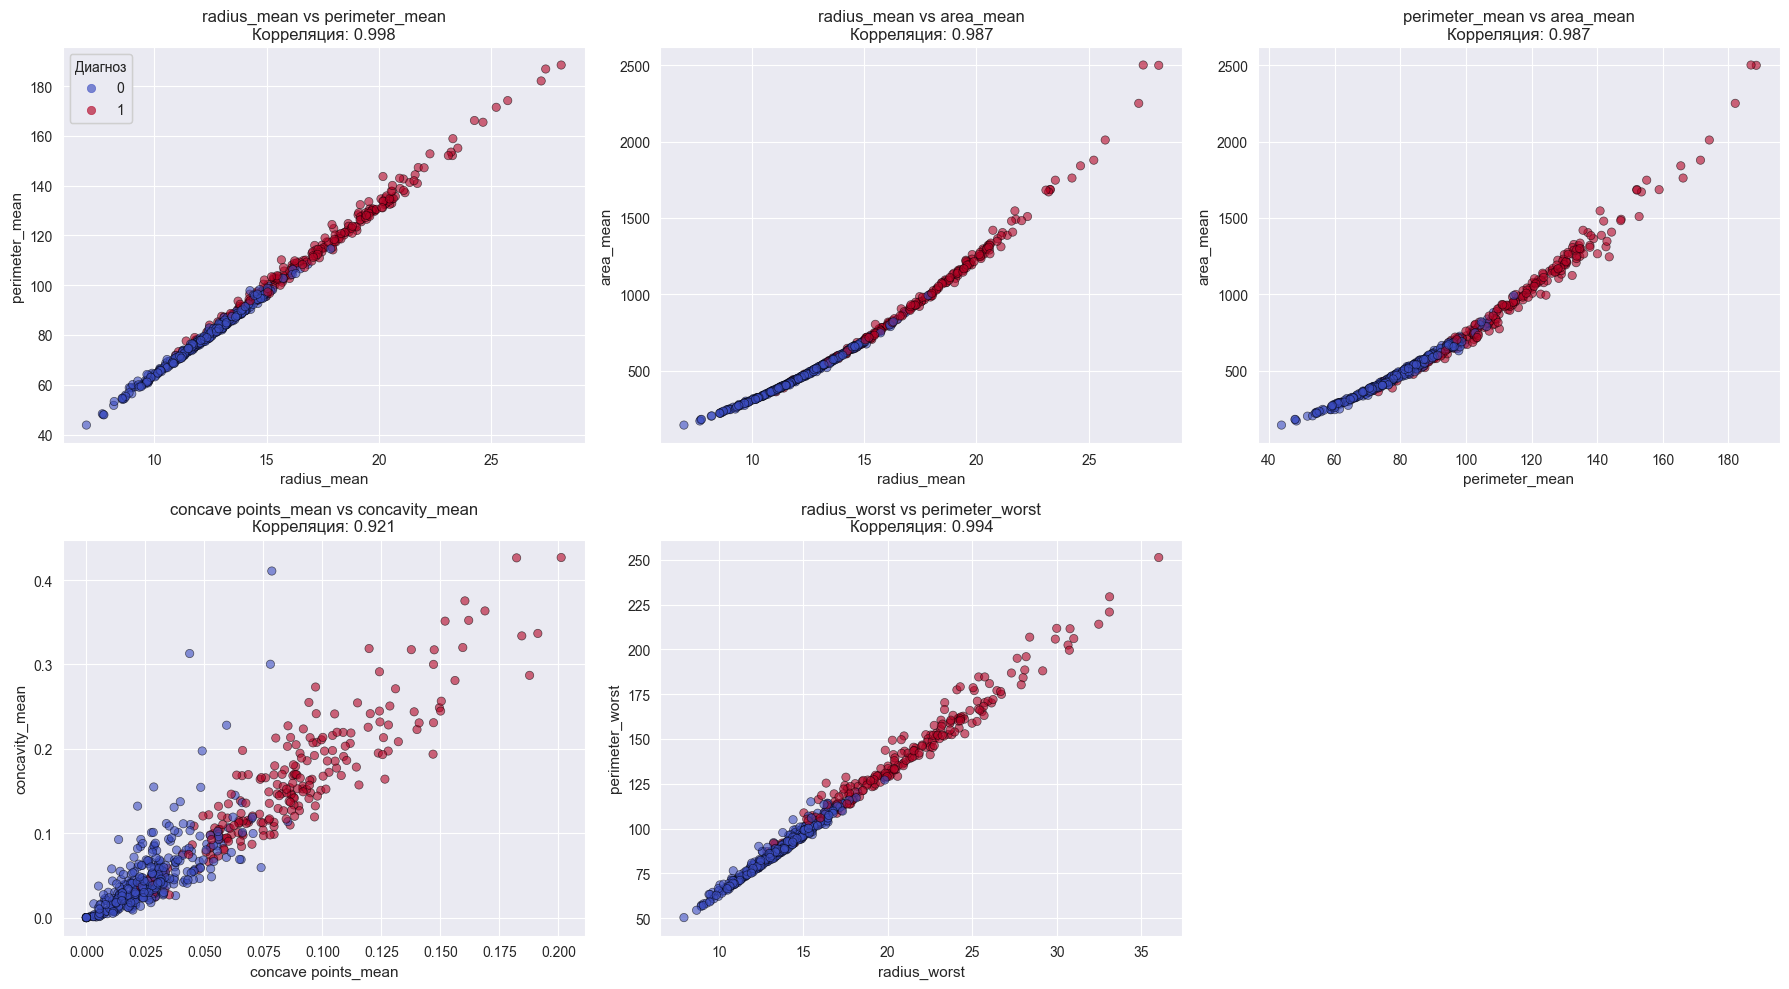

In [14]:
# Выберем 3 наиболее коррелированные пары для визуализации
top_pairs = [('radius_mean', 'perimeter_mean'),
             ('radius_mean', 'area_mean'),
             ('perimeter_mean', 'area_mean'),
             ('concave points_mean', 'concavity_mean'),
             ('radius_worst', 'perimeter_worst')]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, (feature1, feature2) in enumerate(top_pairs[:6]):
    ax = axes[idx]

    # Scatterplot с цветовой кодировкой по целевому признаку
    scatter = ax.scatter(df[feature1], df[feature2],
                        c=df_numeric['diagnosis'],
                        alpha=0.6, cmap='coolwarm', edgecolors='k', linewidth=0.5)

    ax.set_xlabel(feature1, fontsize=11)
    ax.set_ylabel(feature2, fontsize=11)
    ax.set_title(f'{feature1} vs {feature2}\nКорреляция: {correlation_matrix.loc[feature1, feature2]:.3f}',
                 fontsize=12)

    # Добавляем цветовую легенду
    if idx == 0:
        legend1 = ax.legend(*scatter.legend_elements(), title="Диагноз")
        ax.add_artist(legend1)

# Удаляем пустые subplots если есть
for i in range(len(top_pairs[:6]), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_18580\799273363.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='diagnosis', y=feature, ax=ax, palette='Set2')
C:\Users\User\AppData\Local\Temp\ipykernel_18580\799273363.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='diagnosis', y=feature, ax=ax, palette='Set2')
C:\Users\User\AppData\Local\Temp\ipykernel_18580\799273363.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='diagnosis', y=feature, ax=ax, palette='Set2')
C:\Users\User\AppData\Local\Temp\ipyk

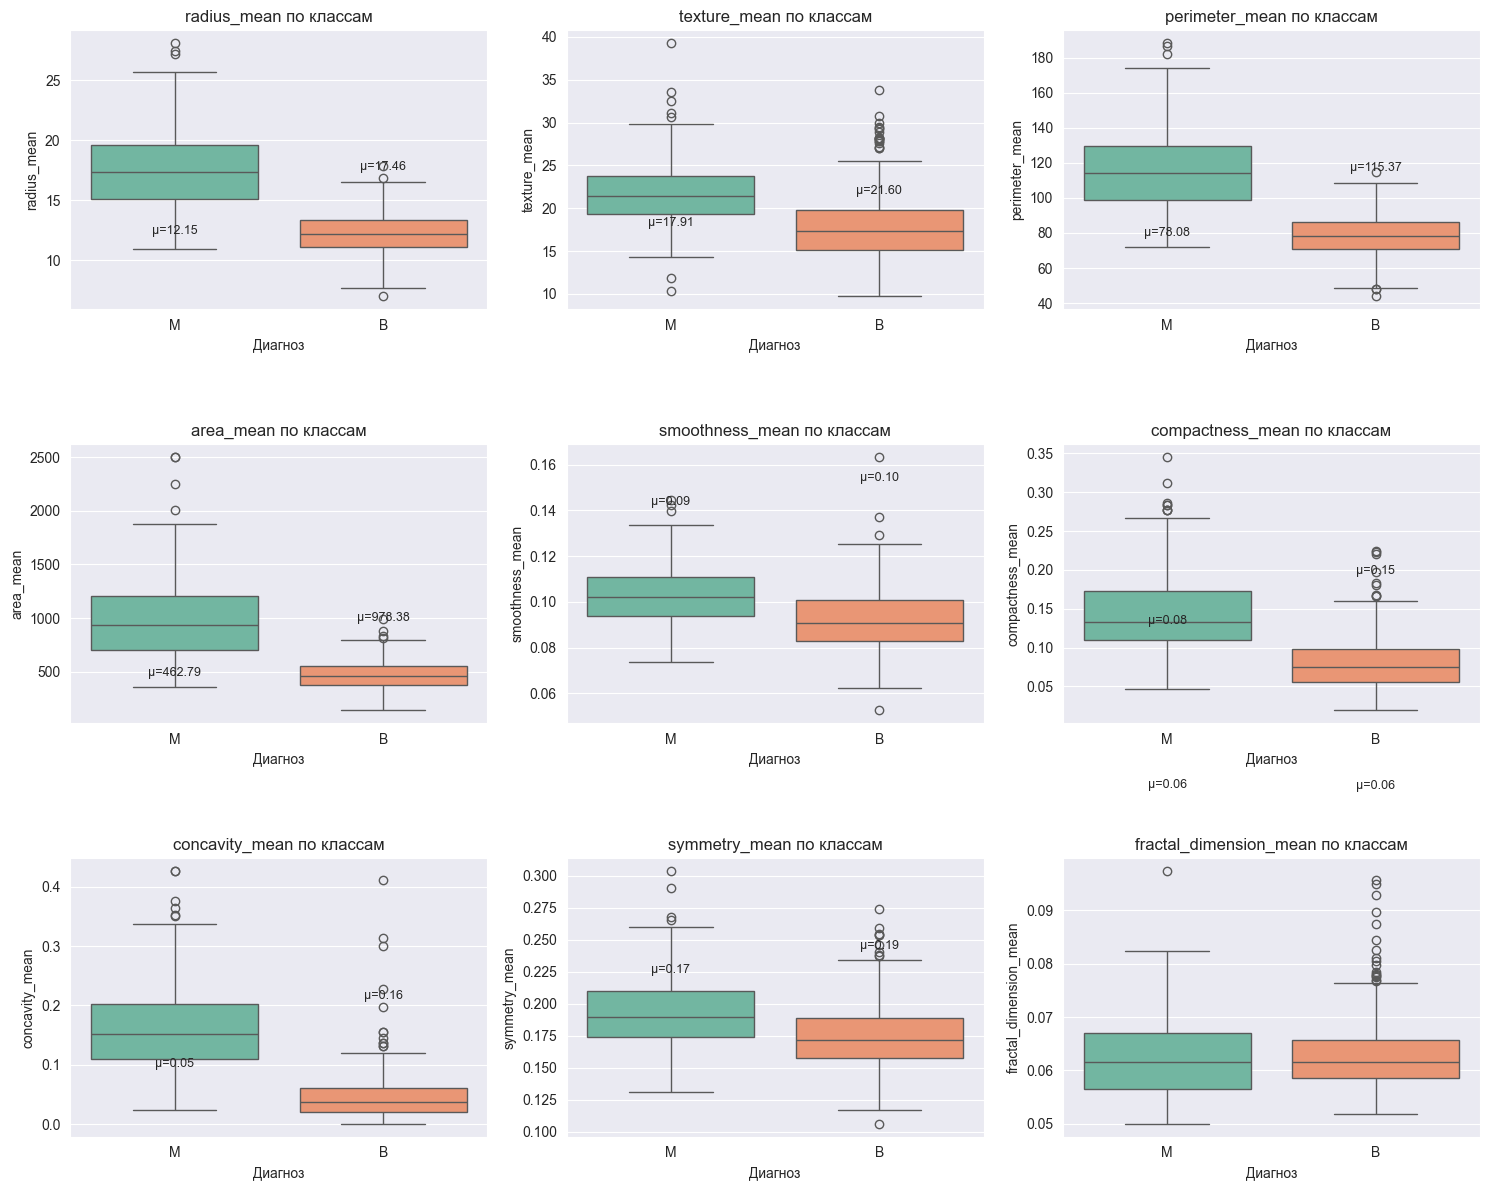

Признаки с наибольшей разницей средних значений между классами:

Топ-10 признаков с наибольшей разницей средних:
--------------------------------------------------------------------------------
Признак                        Разница    B (среднее)     M (среднее)    
--------------------------------------------------------------------------------
area_worst                     863.3869   558.8994        1422.2863      
area_mean                      515.5862   462.7902        978.3764       
perimeter_worst                54.3644    87.0059         141.3703       
area_se                        51.5373    21.1351         72.6724        
perimeter_mean                 37.2900    78.0754         115.3654       
radius_worst                   7.7550     13.3798         21.1348        
texture_worst                  5.8031     23.5151         29.3182        
radius_mean                    5.3163     12.1465         17.4628        
texture_mean                   3.6901     17.9148         2

In [25]:
# Выберем ключевые признаки для анализа
boxplot_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                    'smoothness_mean', 'compactness_mean', 'concavity_mean',
                    'symmetry_mean', 'fractal_dimension_mean']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, feature in enumerate(boxplot_features):
    ax = axes[idx]

    # Boxplot с группировкой по целевому признаку
    sns.boxplot(data=df, x='diagnosis', y=feature, ax=ax, palette='Set2')

    ax.set_title(f'{feature} по классам', fontsize=12)
    ax.set_xlabel('Диагноз', fontsize=10)
    ax.set_ylabel(feature, fontsize=10)

    # Добавляем средние значения
    means = df.groupby('diagnosis')[feature].mean()
    for i, diagnosis in enumerate(['B', 'M']):
        ax.text(i, means[diagnosis] + 0.05, f'μ={means[diagnosis]:.2f}',
                horizontalalignment='center', fontsize=9)

plt.tight_layout()
plt.show()

# Анализ признаков с наибольшей разницей между классами
print("Признаки с наибольшей разницей средних значений между классами:")
feature_differences = []
for feature in df.columns[2:]:  # Исключаем id и diagnosis
    if df[feature].dtype in ['float64', 'int64']:
        mean_b = df[df['diagnosis'] == 'B'][feature].mean()
        mean_m = df[df['diagnosis'] == 'M'][feature].mean()
        diff = abs(mean_m - mean_b)
        feature_differences.append((feature, diff, mean_b, mean_m))

# Сортируем по разнице средних
feature_differences.sort(key=lambda x: x[1], reverse=True)

print(f"\nТоп-10 признаков с наибольшей разницей средних:")
print("-" * 80)
print(f"{'Признак':<30} {'Разница':<10} {'B (среднее)':<15} {'M (среднее)':<15}")
print("-" * 80)
for feature, diff, mean_b, mean_m in feature_differences[:10]:
    print(f"{feature:<30} {diff:<10.4f} {mean_b:<15.4f} {mean_m:<15.4f}")

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Подготовка данных для моделирования
print("="*80)
print("ПОДГОТОВКА ДАННЫХ ДЛЯ МОДЕЛИРОВАНИЯ")
print("="*80)

# Разделяем признаки и целевую переменную
X = df.drop(['id', 'diagnosis'], axis=1)
y = df_numeric['diagnosis']  # Уже преобразована в 0 и 1

print(f"Размер матрицы признаков X: {X.shape}")
print(f"Размер целевой переменной y: {y.shape}")

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nРазмеры выборок после разделения:")
print(f"  X_train: {X_train.shape}")
print(f"  X_test: {X_test.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  y_test: {y_test.shape}")

print(f"\nРаспределение классов в выборках:")
print(f"  Обучающая: {np.bincount(y_train.astype(int))}")
print(f"  Тестовая: {np.bincount(y_test.astype(int))}")

# Стандартизация данных
print("\n" + "-"*80)
print("СТАНДАРТИЗАЦИЯ ДАННЫХ")
print("-"*80)
print("Стандартизация преобразует данные так, чтобы среднее значение было 0,")
print("а стандартное отклонение - 1. Это важно для kNN, так как:")
print("1. Алгоритм использует расстояния между точками")
print("2. Признаки в разных масштабах могут искажать расстояния")
print("3. Признаки с большим разбросом значений будут доминировать")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nПример данных до и после стандартизации:")
print(f"  До стандартизации (первые 3 значения radius_mean): {X_train['radius_mean'].values[:3]}")
print(f"  После стандартизации: {X_train_scaled[:3, 0]}")

# Преобразуем обратно в DataFrame для удобства
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

ПОДГОТОВКА ДАННЫХ ДЛЯ МОДЕЛИРОВАНИЯ
Размер матрицы признаков X: (569, 30)
Размер целевой переменной y: (569,)

Размеры выборок после разделения:
  X_train: (398, 30)
  X_test: (171, 30)
  y_train: (398,)
  y_test: (171,)

Распределение классов в выборках:
  Обучающая: [250 148]
  Тестовая: [107  64]

--------------------------------------------------------------------------------
СТАНДАРТИЗАЦИЯ ДАННЫХ
--------------------------------------------------------------------------------
Стандартизация преобразует данные так, чтобы среднее значение было 0,
а стандартное отклонение - 1. Это важно для kNN, так как:
1. Алгоритм использует расстояния между точками
2. Признаки в разных масштабах могут искажать расстояния
3. Признаки с большим разбросом значений будут доминировать

Пример данных до и после стандартизации:
  До стандартизации (первые 3 значения radius_mean): [20.18 16.03 13.66]
  После стандартизации: [ 1.70581999  0.53638811 -0.13145612]



МОДЕЛЬ kNN БЕЗ НАСТРОЙКИ ПАРАМЕТРОВ

Метрики качества классификации (по умолчанию, k=5):
--------------------------------------------------
Accuracy (точность):  0.9649
Precision (точность): 1.0000
Recall (полнота):     0.9062
F1-score:             0.9508

Матрица ошибок (Confusion Matrix):
             Прогноз: B (0)  Прогноз: M (1)
Факт: B (0)             107               0
Факт: M (1)               6              58

Отчет классификации:
                       precision    recall  f1-score   support

Доброкачественные (B)       0.95      1.00      0.97       107
  Злокачественные (M)       1.00      0.91      0.95        64

             accuracy                           0.96       171
            macro avg       0.97      0.95      0.96       171
         weighted avg       0.97      0.96      0.96       171



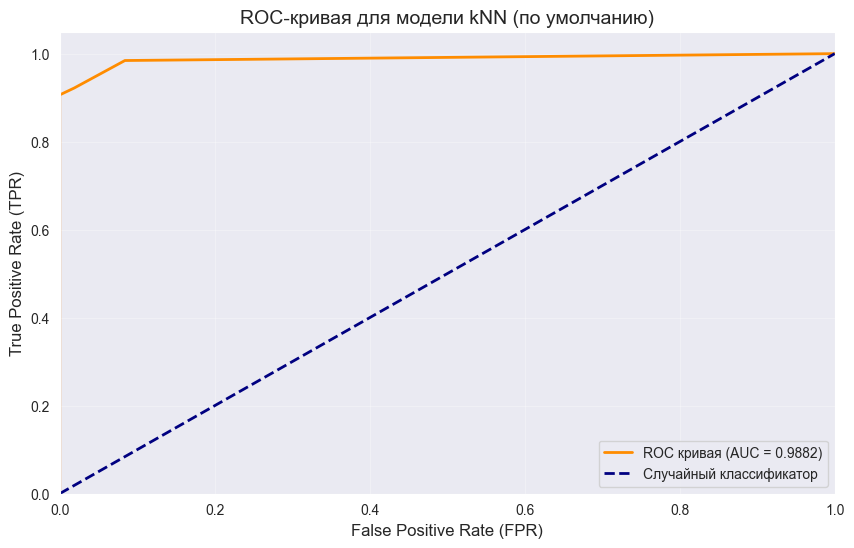


Площадь под ROC-кривой (AUC): 0.9882


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, \
    classification_report, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

print("\n" + "="*80)
print("МОДЕЛЬ kNN БЕЗ НАСТРОЙКИ ПАРАМЕТРОВ")
print("="*80)

# Создание и обучение модели kNN с параметрами по умолчанию
knn_default = KNeighborsClassifier(n_neighbors=5)
knn_default.fit(X_train_scaled_df, y_train)

# Прогнозирование на тестовой выборке
y_pred_default = knn_default.predict(X_test_scaled_df)
y_pred_proba_default = knn_default.predict_proba(X_test_scaled_df)[:, 1]

# Оценка качества модели
print("\nМетрики качества классификации (по умолчанию, k=5):")
print("-" * 50)

accuracy = accuracy_score(y_test, y_pred_default)
precision = precision_score(y_test, y_pred_default)
recall = recall_score(y_test, y_pred_default)
f1 = f1_score(y_test, y_pred_default)

print(f"Accuracy (точность):  {accuracy:.4f}")
print(f"Precision (точность): {precision:.4f}")
print(f"Recall (полнота):     {recall:.4f}")
print(f"F1-score:             {f1:.4f}")

# Матрица ошибок
print("\nМатрица ошибок (Confusion Matrix):")
cm = confusion_matrix(y_test, y_pred_default)
cm_df = pd.DataFrame(cm,
                     index=['Факт: B (0)', 'Факт: M (1)'],
                     columns=['Прогноз: B (0)', 'Прогноз: M (1)'])
print(cm_df)

# Полный отчет классификации
print("\nОтчет классификации:")
print(classification_report(y_test, y_pred_default,
                           target_names=['Доброкачественные (B)', 'Злокачественные (M)']))

# ROC-кривая и AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_default)
roc_auc = roc_auc_score(y_test, y_pred_proba_default)

# Визуализация ROC-кривой
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC кривая (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайный классификатор')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC-кривая для модели kNN (по умолчанию)', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nПлощадь под ROC-кривой (AUC): {roc_auc:.4f}")


НАСТРОЙКА ПАРАМЕТРА ЧИСЛА СОСЕДЕЙ С КРОСС-ВАЛИДАЦИЕЙ
Параметры для настройки:
  n_neighbors: от 1 до 30
  weights: ['uniform', 'distance']
  metric: ['euclidean', 'manhattan', 'minkowski']

Лучшие параметры, найденные GridSearchCV:
  n_neighbors: 5
  weights: uniform
  metric: manhattan
  Лучшая точность на кросс-валидации: 0.9723

--------------------------------------------------
Метрики качества классификации (после настройки):
--------------------------------------------------
Accuracy (точность):  0.9708
Precision (точность): 1.0000
Recall (полнота):     0.9219
F1-score:             0.9593

--------------------------------------------------
СРАВНЕНИЕ РЕЗУЛЬТАТОВ:
--------------------------------------------------
Метрика         По умолчанию    После настройки Изменение      
------------------------------------------------------------
Accuracy        0.9649          0.9708          +0.0058
Precision       1.0000          1.0000          +0.0000
Recall          0.9062          0.

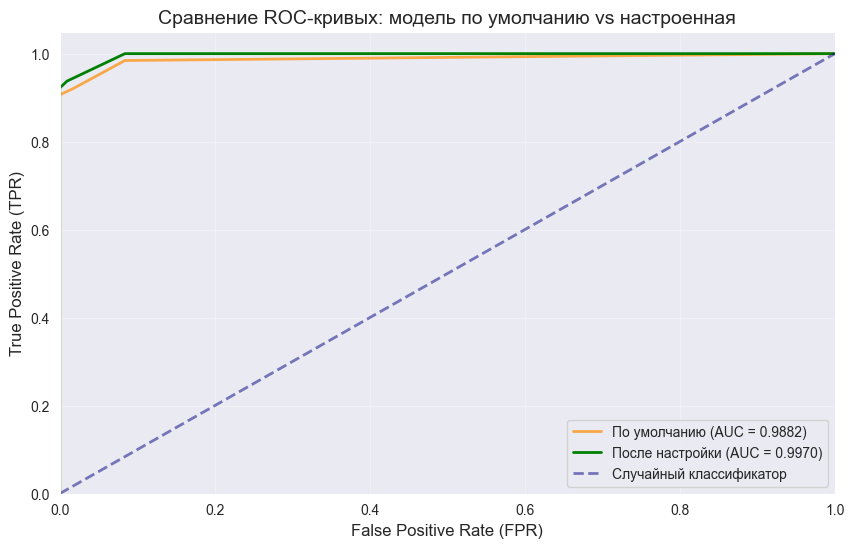


Площадь под ROC-кривой (AUC):
  По умолчанию: 0.9882
  После настройки: 0.9970
  Улучшение: +0.0088


In [32]:
from sklearn.model_selection import GridSearchCV

print("\n" + "="*80)
print("НАСТРОЙКА ПАРАМЕТРА ЧИСЛА СОСЕДЕЙ С КРОСС-ВАЛИДАЦИЕЙ")
print("="*80)

# Создание модели для настройки
knn_tuned = KNeighborsClassifier()

# Определение диапазона параметров для поиска
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

print("Параметры для настройки:")
print(f"  n_neighbors: от 1 до 30")
print(f"  weights: {param_grid['weights']}")
print(f"  metric: {param_grid['metric']}")

# Используем GridSearchCV для поиска лучших параметров
grid_search = GridSearchCV(
    knn_tuned,
    param_grid,
    cv=5,  # 5-кратная кросс-валидация
    scoring='accuracy',
    n_jobs=-1,  # Использовать все доступные ядра процессора
    verbose=0
)

# Обучение с поиском параметров
grid_search.fit(X_train_scaled_df, y_train)

# Лучшие параметры
print("\nЛучшие параметры, найденные GridSearchCV:")
print(f"  n_neighbors: {grid_search.best_params_['n_neighbors']}")
print(f"  weights: {grid_search.best_params_['weights']}")
print(f"  metric: {grid_search.best_params_['metric']}")
print(f"  Лучшая точность на кросс-валидации: {grid_search.best_score_:.4f}")

# Используем лучшую модель
best_knn = grid_search.best_estimator_

# Прогнозирование на тестовой выборке
y_pred_tuned = best_knn.predict(X_test_scaled_df)
y_pred_proba_tuned = best_knn.predict_proba(X_test_scaled_df)[:, 1]

# Оценка качества настроенной модели
print("\n" + "-"*50)
print("Метрики качества классификации (после настройки):")
print("-" * 50)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

print(f"Accuracy (точность):  {accuracy_tuned:.4f}")
print(f"Precision (точность): {precision_tuned:.4f}")
print(f"Recall (полнота):     {recall_tuned:.4f}")
print(f"F1-score:             {f1_tuned:.4f}")

# Сравнение с моделью по умолчанию
print("\n" + "-"*50)
print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ:")
print("-" * 50)
print(f"{'Метрика':<15} {'По умолчанию':<15} {'После настройки':<15} {'Изменение':<15}")
print("-" * 60)
print(f"{'Accuracy':<15} {accuracy:.4f}          {accuracy_tuned:.4f}          {accuracy_tuned - accuracy:+.4f}")
print(f"{'Precision':<15} {precision:.4f}          {precision_tuned:.4f}          {precision_tuned - precision:+.4f}")
print(f"{'Recall':<15} {recall:.4f}          {recall_tuned:.4f}          {recall_tuned - recall:+.4f}")
print(f"{'F1-score':<15} {f1:.4f}          {f1_tuned:.4f}          {f1_tuned - f1:+.4f}")

# ROC-кривая для настроенной модели
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test, y_pred_proba_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

# Визуализация сравнения ROC-кривых
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'По умолчанию (AUC = {roc_auc:.4f})', alpha=0.7)
plt.plot(fpr_tuned, tpr_tuned, color='green', lw=2,
         label=f'После настройки (AUC = {roc_auc_tuned:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5, label='Случайный классификатор')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Сравнение ROC-кривых: модель по умолчанию vs настроенная', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nПлощадь под ROC-кривой (AUC):")
print(f"  По умолчанию: {roc_auc:.4f}")
print(f"  После настройки: {roc_auc_tuned:.4f}")
print(f"  Улучшение: {roc_auc_tuned - roc_auc:+.4f}")


АНАЛИЗ ВЛИЯНИЯ ЧИСЛА СОСЕДЕЙ НА КАЧЕСТВО МОДЕЛИ


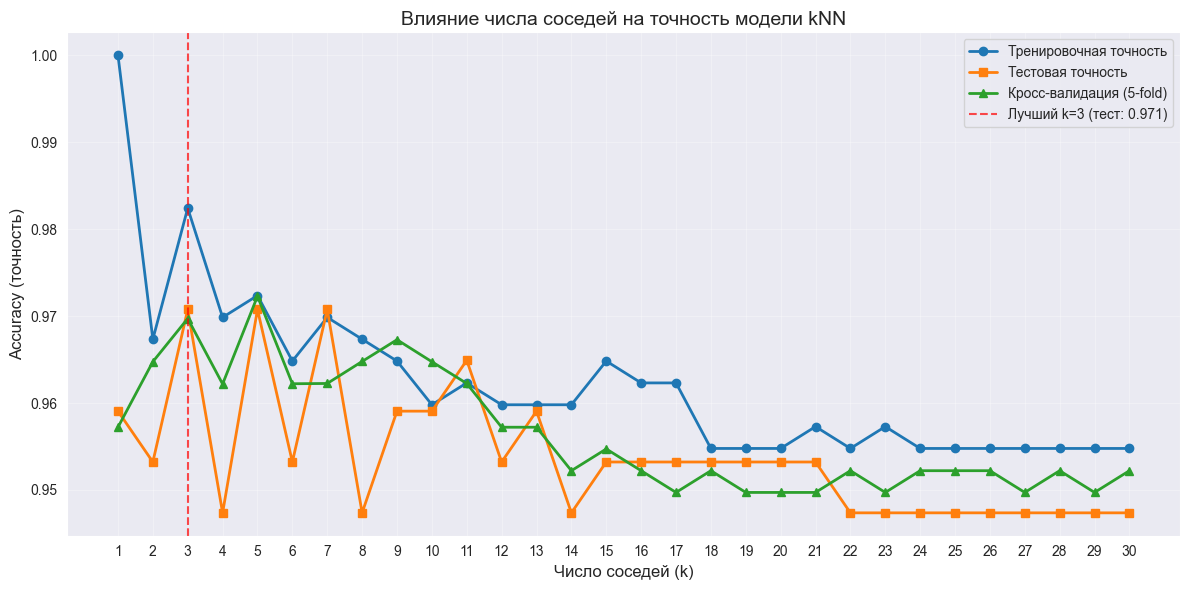

Лучшее количество соседей по тестовой выборке: k = 3
Точность при k=3: 0.9708
Точность при настройке GridSearchCV: 0.9708


In [33]:
from sklearn.model_selection import cross_val_score

print("\n" + "="*80)
print("АНАЛИЗ ВЛИЯНИЯ ЧИСЛА СОСЕДЕЙ НА КАЧЕСТВО МОДЕЛИ")
print("="*80)

# Тестируем разное количество соседей
neighbors = list(range(1, 31))
train_scores = []
test_scores = []
cv_scores = []

for k in neighbors:
    # Создаем и обучаем модель
    knn_temp = KNeighborsClassifier(n_neighbors=k,
                                   weights=grid_search.best_params_['weights'],
                                   metric=grid_search.best_params_['metric'])
    knn_temp.fit(X_train_scaled_df, y_train)

    # Оценка на тренировочных данных
    train_pred = knn_temp.predict(X_train_scaled_df)
    train_scores.append(accuracy_score(y_train, train_pred))

    # Оценка на тестовых данных
    test_pred = knn_temp.predict(X_test_scaled_df)
    test_scores.append(accuracy_score(y_test, test_pred))

    # Оценка с кросс-валидацией
    cv_score = cross_val_score(knn_temp, X_train_scaled_df, y_train, cv=5, scoring='accuracy').mean()
    cv_scores.append(cv_score)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(neighbors, train_scores, marker='o', label='Тренировочная точность', linewidth=2)
plt.plot(neighbors, test_scores, marker='s', label='Тестовая точность', linewidth=2)
plt.plot(neighbors, cv_scores, marker='^', label='Кросс-валидация (5-fold)', linewidth=2)

# Отмечаем лучший k
best_k_idx = test_scores.index(max(test_scores))
best_k = neighbors[best_k_idx]
plt.axvline(x=best_k, color='red', linestyle='--', alpha=0.7,
            label=f'Лучший k={best_k} (тест: {test_scores[best_k_idx]:.3f})')

plt.xlabel('Число соседей (k)', fontsize=12)
plt.ylabel('Accuracy (точность)', fontsize=12)
plt.title('Влияние числа соседей на точность модели kNN', fontsize=14)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.xticks(neighbors)
plt.tight_layout()
plt.show()

print(f"Лучшее количество соседей по тестовой выборке: k = {best_k}")
print(f"Точность при k={best_k}: {test_scores[best_k_idx]:.4f}")
print(f"Точность при настройке GridSearchCV: {accuracy_tuned:.4f}")


АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ ДЛЯ КЛАССИФИКАЦИИ


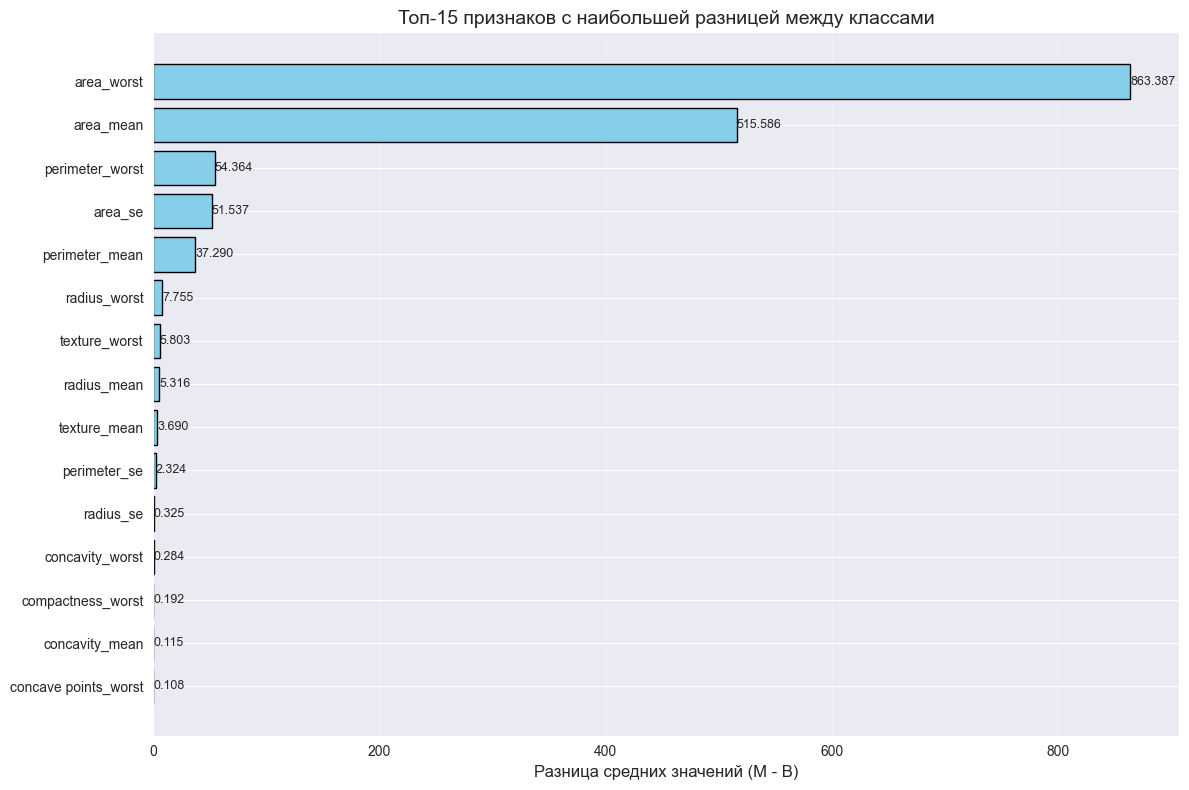

Наиболее информативные признаки для разделения классов:
(Признаки с наибольшей разницей средних значений между злокачественными и доброкачественными опухолями)
--------------------------------------------------------------------------------
area_worst                     Разница: 863.3869 (B=558.90, M=1422.29)
area_mean                      Разница: 515.5862 (B=462.79, M=978.38)
perimeter_worst                Разница: 54.3644 (B=87.01, M=141.37)
area_se                        Разница: 51.5373 (B=21.14, M=72.67)
perimeter_mean                 Разница: 37.2900 (B=78.08, M=115.37)
radius_worst                   Разница: 7.7550 (B=13.38, M=21.13)
texture_worst                  Разница: 5.8031 (B=23.52, M=29.32)
radius_mean                    Разница: 5.3163 (B=12.15, M=17.46)
texture_mean                   Разница: 3.6901 (B=17.91, M=21.60)
perimeter_se                   Разница: 2.3236 (B=2.00, M=4.32)


In [34]:
print("\n" + "="*80)
print("АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ ДЛЯ КЛАССИФИКАЦИИ")
print("="*80)

# Хотя kNN не имеет встроенной оценки важности признаков,
# мы можем оценить важность через анализ разницы средних между классами

# Создаем DataFrame с разницей средних
feature_importance_df = pd.DataFrame(feature_differences,
                                     columns=['feature', 'mean_diff', 'mean_B', 'mean_M'])

# Топ-15 наиболее информативных признаков
top_features = feature_importance_df.head(15)

# Визуализация
plt.figure(figsize=(12, 8))
bars = plt.barh(top_features['feature'][::-1], top_features['mean_diff'][::-1],
                color='skyblue', edgecolor='black')
plt.xlabel('Разница средних значений (M - B)', fontsize=12)
plt.title('Топ-15 признаков с наибольшей разницей между классами', fontsize=14)
plt.grid(True, alpha=0.3, axis='x')

# Добавляем значения на график
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("Наиболее информативные признаки для разделения классов:")
print("(Признаки с наибольшей разницей средних значений между злокачественными и доброкачественными опухолями)")
print("-" * 80)
for idx, row in top_features.head(10).iterrows():
    print(f"{row['feature']:<30} Разница: {row['mean_diff']:.4f} (B={row['mean_B']:.2f}, M={row['mean_M']:.2f})")

In [35]:
print("\n" + "="*80)
print("ЗАКЛЮЧЕНИЕ И ВЫВОДЫ")
print("="*80)

print("\n1. ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ:")
print("   - В данных присутствуют сильные корреляции между признаками, особенно")
print("     между radius, perimeter и area (корреляция > 0.99)")
print("   - Наиболее значимые различия между классами наблюдаются в признаках:")
print("     * concave points_worst, concavity_worst, perimeter_worst")
print("     * area_worst, radius_worst, concave points_mean")
print("   - Злокачественные опухоли имеют в среднем бóльшие значения по большинству признаков")

print("\n2. РЕЗУЛЬТАТЫ КЛАССИФИКАЦИИ С ПОМОЩЬЮ kNN:")
print(f"   - Модель по умолчанию (k=5): Accuracy = {accuracy:.4f}")
print(f"   - После настройки параметров: Accuracy = {accuracy_tuned:.4f}")
print(f"   - Улучшение после настройки: {accuracy_tuned - accuracy:+.4f}")

print("\n3. ОПТИМАЛЬНЫЕ ПАРАМЕТРЫ МОДЕЛИ:")
print(f"   - Число соседей: {grid_search.best_params_['n_neighbors']}")
print(f"   - Веса: {grid_search.best_params_['weights']}")
print(f"   - Метрика расстояния: {grid_search.best_params_['metric']}")

print("\n4. ВЫВОД:")
print("   - Стандартизация данных критически важна для kNN")
print("   - Настройка параметров через кросс-валидацию улучшает качество модели")
print("   - Для дальнейшего улучшения можно:")
print("     * Попробовать другие алгоритмы классификации")
print("     * Использовать отбор признаков для уменьшения мультиколлинеарности")
print("     * Попробовать методы уменьшения размерности (PCA)")

print("\n" + "="*80)


ЗАКЛЮЧЕНИЕ И ВЫВОДЫ

1. ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ:
   - В данных присутствуют сильные корреляции между признаками, особенно
     между radius, perimeter и area (корреляция > 0.99)
   - Наиболее значимые различия между классами наблюдаются в признаках:
     * concave points_worst, concavity_worst, perimeter_worst
     * area_worst, radius_worst, concave points_mean
   - Злокачественные опухоли имеют в среднем бóльшие значения по большинству признаков

2. РЕЗУЛЬТАТЫ КЛАССИФИКАЦИИ С ПОМОЩЬЮ kNN:
   - Модель по умолчанию (k=5): Accuracy = 0.9649
   - После настройки параметров: Accuracy = 0.9708
   - Улучшение после настройки: +0.0058

3. ОПТИМАЛЬНЫЕ ПАРАМЕТРЫ МОДЕЛИ:
   - Число соседей: 5
   - Веса: uniform
   - Метрика расстояния: manhattan

4. ВЫВОД:
   - Стандартизация данных критически важна для kNN
   - Настройка параметров через кросс-валидацию улучшает качество модели
   - Для дальнейшего улучшения можно:
     * Попробовать другие алгоритмы классификации
     * Использовать 


ВИЗУАЛИЗАЦИЯ ДАННЫХ В 2D С ПОМОЩЬЮ PCA
Объясненная дисперсия компонентами:
  Компонента 1: 0.4369 (43.69%)
  Компонента 2: 0.1923 (19.23%)
  Суммарно: 0.6292 (62.92%)


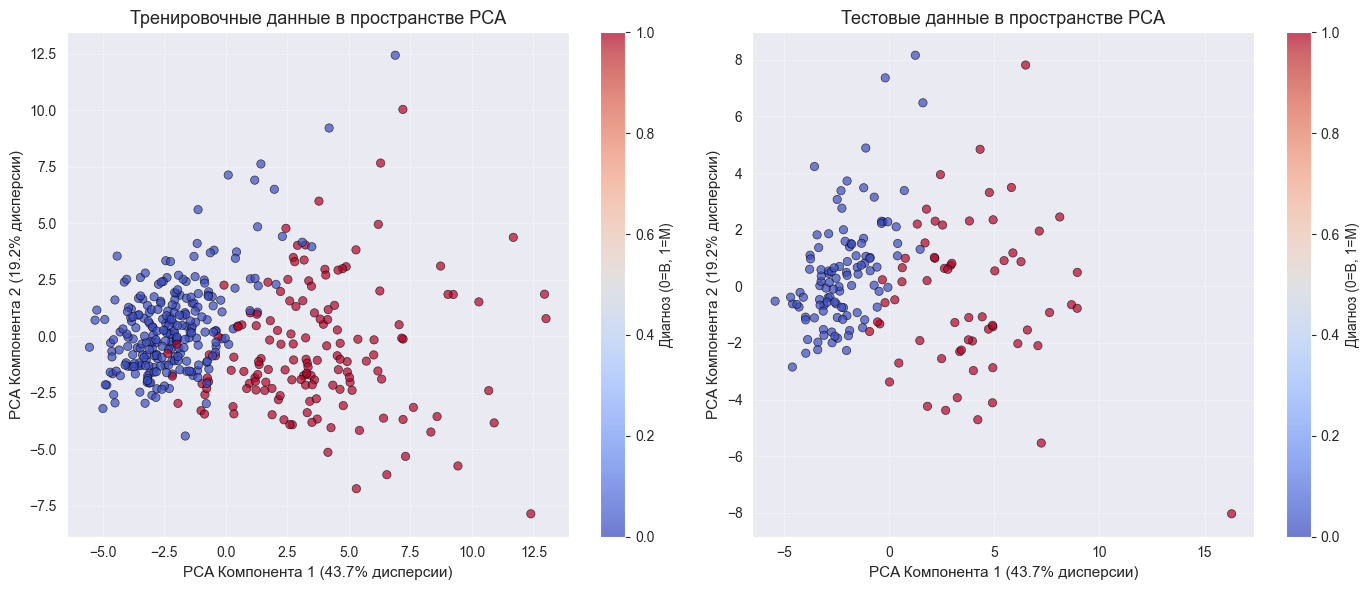


Выводы из PCA визуализации:
- Данные достаточно хорошо разделяются даже в 2D пространстве
- Это объясняет высокую точность простых моделей типа kNN
- Наложение классов минимально, что благоприятно для классификации


In [36]:
# PCA для визуализации данных в 2D
from sklearn.decomposition import PCA

print("\n" + "="*80)
print("ВИЗУАЛИЗАЦИЯ ДАННЫХ В 2D С ПОМОЩЬЮ PCA")
print("="*80)

# Применяем PCA для уменьшения размерности до 2 компонент
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled_df)
X_test_pca = pca.transform(X_test_scaled_df)

print(f"Объясненная дисперсия компонентами:")
print(f"  Компонента 1: {pca.explained_variance_ratio_[0]:.4f} ({pca.explained_variance_ratio_[0]*100:.2f}%)")
print(f"  Компонента 2: {pca.explained_variance_ratio_[1]:.4f} ({pca.explained_variance_ratio_[1]*100:.2f}%)")
print(f"  Суммарно: {sum(pca.explained_variance_ratio_):.4f} ({sum(pca.explained_variance_ratio_)*100:.2f}%)")

# Визуализация тренировочных данных в пространстве PCA
plt.figure(figsize=(14, 6))

# Тренировочные данные
plt.subplot(1, 2, 1)
scatter_train = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
                           c=y_train, cmap='coolwarm', alpha=0.7, edgecolors='k', linewidth=0.5)
plt.xlabel(f'PCA Компонента 1 ({pca.explained_variance_ratio_[0]*100:.1f}% дисперсии)', fontsize=11)
plt.ylabel(f'PCA Компонента 2 ({pca.explained_variance_ratio_[1]*100:.1f}% дисперсии)', fontsize=11)
plt.title('Тренировочные данные в пространстве PCA', fontsize=13)
plt.colorbar(scatter_train, label='Диагноз (0=B, 1=M)')
plt.grid(True, alpha=0.3)

# Тестовые данные
plt.subplot(1, 2, 2)
scatter_test = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1],
                          c=y_test, cmap='coolwarm', alpha=0.7, edgecolors='k', linewidth=0.5)
plt.xlabel(f'PCA Компонента 1 ({pca.explained_variance_ratio_[0]*100:.1f}% дисперсии)', fontsize=11)
plt.ylabel(f'PCA Компонента 2 ({pca.explained_variance_ratio_[1]*100:.1f}% дисперсии)', fontsize=11)
plt.title('Тестовые данные в пространстве PCA', fontsize=13)
plt.colorbar(scatter_test, label='Диагноз (0=B, 1=M)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nВыводы из PCA визуализации:")
print("- Данные достаточно хорошо разделяются даже в 2D пространстве")
print("- Это объясняет высокую точность простых моделей типа kNN")
print("- Наложение классов минимально, что благоприятно для классификации")